# Linear Regression con Python

En este proyecto se utilizó Machine Learning a través del algoritmo de Regresión Lineal para estimar el valor de la variable dependiente. Se realizó de dos maneras: la primera se hizo con la librería de numpy, mientras que en la segunda parte se realizó con la librería de Scikit Learn.

In [1]:
#En esta celda estamos importando los paquetes que vamos a utilizar en esta parte.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Aquí estamos importando el archivo para poder utilizarlo.
data = pd.read_csv("ex1data1.txt")

In [3]:
#Aquí estamos viendo los primeros 5 registros del dataset.
data.head()

,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [4]:
#Aquí vemos la forma del dataset.Tiene 96 filas y 2 columnas.
data.shape

(96, 2)

In [5]:
#Aquí estamos creando una función para calcular los valores de la función de costo J(theta) dependiendo 
#de los parámetros x,y,theta0 y theta1.

#theta0 y theta1 serán valores aleatorios asignados por mí para ver cómo mejora o empeora la función de costo.

#x y y son los datos de entrenamiento que importamos anteriormente.Es el data set de 96 filas y dos columnas. La primera 
#columna es x y la segunda columna es y.

def cost_function(x, y, theta0, theta1):

    m = len(y)

    h = theta1 * x + theta0 * 1
    J = np.sum((h - y)**2)/(2*m)

    return J

In [6]:
#En esta celda hacemos uso de la función creada de la celda anterior.

#x es la primera columna del dataset y y es la segunda columna del dataset.

#theta0 y theta1 son valores aleatorios.

#En el resultado verás el valor de la función de costo, de acuerdo los valores de theta que coloqué.

x = data.iloc[:,0]
y = data.iloc[:,1]

theta0 = -1.3
theta1 = 1

cost_function(x, y, theta0, theta1)

4.478006811033333

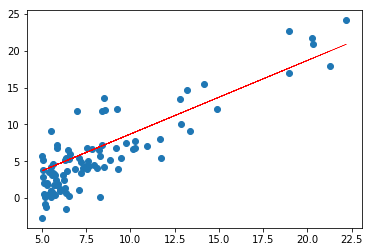

In [7]:
#Aquí lo que estoy haciendo es graficar los datos de entrenamiento (azul) y la hipótesis con los parámetros theta que utilicé.

#Al tener un valor bajo en la función de costo, mi hipótesis (rojo) se ajustará de mejor manera a mis datos de entrenamiento.

h = theta1 * x + theta0 * 1
plt.scatter(x,y)
plt.plot(x,h, color = "red", linewidth = 0.5)
plt.show()

Iteration : 0
Cost : 30.79495785534583


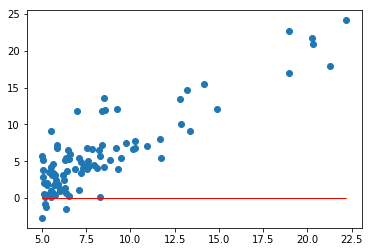

Iteration : 1000
Cost : 3.5047572070621515


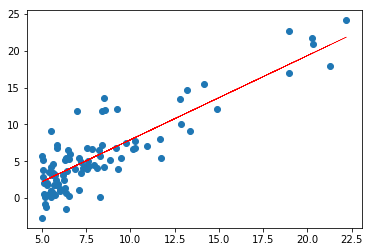

Iteration : 2000
Cost : 3.460797756644736


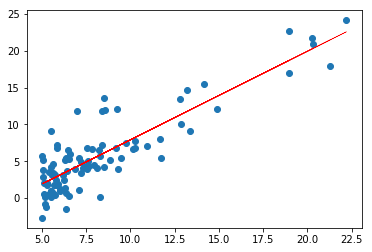

Iteration : 3000
Cost : 3.459614626782937


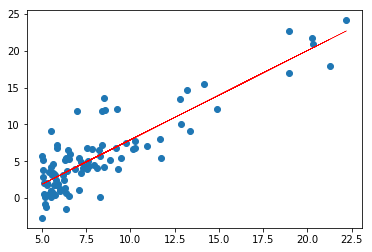

Iteration : 4000
Cost : 3.4595827838855264


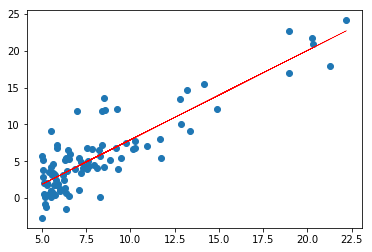

Iteration : 5000
Cost : 3.45958192686201


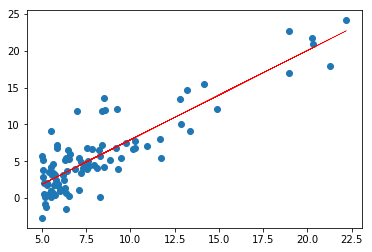

Iteration : 6000
Cost : 3.459581903795977


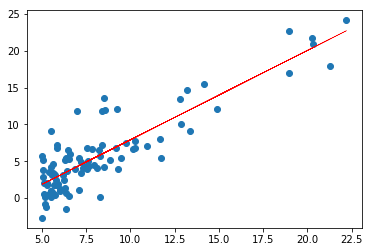

Iteration : 7000
Cost : 3.459581903175175


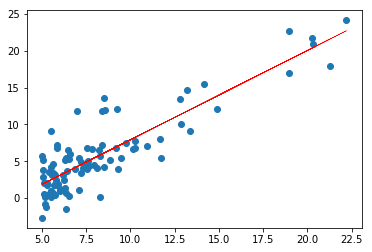

Iteration : 8000
Cost : 3.4595819031584667


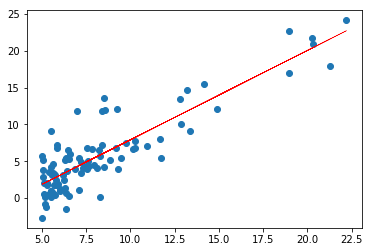

Iteration : 9000
Cost : 3.4595819031580164


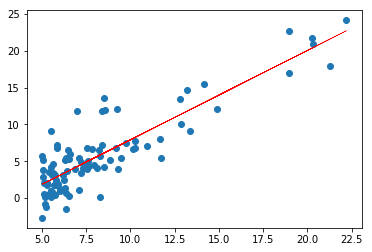

-4.2115039448398575 1.2135472478403604
3.459581903158005


In [8]:
#EN ESTA CELDA UTILIZAMOS EL ALGORITMO DE GRADIENT DESCENT PARA ENCONTRAR LOS THETAS QUE MEJOR SE AJUSTEN A LOS DATOS.

#Aquí especificamos qué es x y qué es y. También colocamos los valores iniciales de theta0 y theta1.

x = data.iloc[:,0]
y = data.iloc[:,1]

theta0 = 0
theta1 = 0

#Aquí colocamos cuántas iteraciones queremos hacer para que algoritmo aprenda. Y también el learning rate.
#También colacamos el valor de m, que está dentro de las fórmulas de gradient descent y función de costo.

iterations = 10000
alpha = 0.01

m = len(y)

#Aquí empezamos con las iteraciones a través de un ciclo for.
#1. Calculamos el valor de la hipótesis.
#2. Calculamos los valores de gradient descent.
#3. Calculamos el valor del costo.
#4. Empezamos el ciclo con los nuevos thetas que salieron de los valores del gradient descent.
#5. En cada iteración se imprimirán el número de iteración y el valor del costo.

#Al final se imprimen los últimos thetas con mejor costo y el valor del costo.

for iteration in range(iterations):

    h = theta1 * x + theta0
    
    theta0temp = theta0 - alpha*(1/m) * np.sum((h-y))
    theta1temp = theta1 - alpha *(1/m) * np.sum((h-y)*x)
    
    theta0 = theta0temp
    theta1 = theta1temp
    
    cost = np.sum((h - y)**2)/(2*m)
    
    if(iteration % 1000 == 0):
        print("Iteration :", iteration)
        print("Cost :", cost)
        plt.scatter(x,y)
        plt.plot(x,h, color = "red", linewidth = 0.5)
        plt.show()
        
print(theta0, theta1)
print(cost)

In [9]:
#Aquí imprimo los últimos thetas que tienen el mejor costo.
#Escogo una x al azar para evaluarlo en nuestra hipótesis optimizada.
#Especifico nuevamente la hipótesis.
#Imprimo el resultado de la función. Es decir, el valor y.

print(theta0)
print(theta1)
x_new = 30
h = theta1 * x_new + theta0
print("El precio de la casa es:", h)

-4.2115039448398575
1.2135472478403604
El precio de la casa es: 32.19491349037096


# Linear Regression con Scikit Learn

In [10]:
#Aquí importamos las librerías de numpy y scikit learn.

import numpy as np
from sklearn.linear_model import LinearRegression

In [11]:
#Aquí nos aseguramos que la variable x y la variable y están vectorizadas.

x = data.iloc[:,0]
y = data.iloc[:,1]
x = np.array(x).reshape(96,1)
y = np.array(y).reshape(96,1)
print(x.shape, y.shape)

(96, 1) (96, 1)


In [12]:
#Aquí hacemos el entrenamiento del algoritmo. El equivalente a realizar el ciclo for que hicimos anteriormente.

lr = LinearRegression()
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

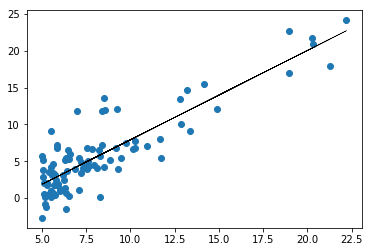

In [13]:
#Aquí graficamos la recta que mejor se ajusta a los datos históricos.

y_new = lr.predict(x)

plt.scatter(x,y)
plt.plot(x,y_new, color = "black", linewidth = 0.5)
plt.show()

In [14]:
#Aquí encontramos los thetas que mejor ajustan la hipótesis a los datos históricos.

theta0_new = lr.intercept_
theta1_new = lr.coef_
print(theta0_new, theta1_new)

[-4.21150401] [[1.21354725]]


In [15]:
#Aquí utilizamos nuevamente la función que creamos anteriormente ("cost_function"), para ver el valor del costo con los thetas
#que scikit learn nos arrojó.

x = data.iloc[:,0]
y = data.iloc[:,1]

theta0 = -4.21150401
theta1 = 1.21354725

cost_function(x, y, theta0, theta1)

3.4595819031580053

## Conclusión 

1. En este ejercicio lo que hicimos fue aplicar Machine Learning de dos maneras diferentes. La primera es más detallada y más complicada porque se utilizó el algoritmo de gradient descent para encontrar los mejores thetas.
2. La segunda manera fue a través de la librería de scikit learn. En esta opción fue más rápida y práctica; pero muy peligrosa porque si hacemos uso extremo de esta librería podemos caer en no entender lo que hacen los códigos específicamente.
3. Podemos ver que de las dos maneras nos salieron thetas y costos casi idénticos.
4. En la primera manera: thet0 = -4.2115039448398575, theta1 = 1.2135472478403604 y costo = 3.459581903158005.
5. Con scikit learn: theta0 = -4.21150401, theta1 = 1.21354725 y costo = 3.4595819031580053.